Import bibliotek

In [357]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)

# Spis treści
1. [Zadanie 1 Generate Synthetic Data](#Zadanie-1-Generate-Synthetic-Data)
2. [Zadanie 2 Prepare the Data](#zadanie-2-prepare-the-data)
3. [Zadanie 3 Initialize Parameters](#zadanie-3-initialize-parameters)
4. [Zadanie 4 Implement Gradient Descent](#zadanie-4-implement-gradient-descent)
5. [Zadanie 5 Run the Training Loop](#zadanie-5-run-the-training-loop)
6. [Zadanie 6 Check Your Results](#zadanie-6-check-your-results)
7. [Zadanie 7 Experiment with Learning Rate](#zadanie-7-experiment-with-learning-rate)
8. [Zadanie 8 Explore Training Duration](#zadanie-8-explore-training-duration)
9. [Zadanie 9 Visualize the Loss Landscape](#zadanie-9-visualize-the-loss-landscape)
10. [Zadanie 10 Analytical Solution](#zadanie-10-analytical-solution)
11. [Zadanie 11 High Dimensional Example](#zadanie-11-high-dimensional-example)

## Zadanie 1 **Generate Synthetic Data**
Generate a synthetic (syntetyczny) dataset with a known linear relationship.  Create 100 data points with a single feature, using a true weight (*rzeczywista waga*) of 2 and a bias of 5, plus a small amount of Gaussian noise.  
This will create data that follows the relationship:

$$ y = 2x + 5 + \epsilon $$

where $ \epsilon $ is random noise.

Set a random seed for reproducibility.  
Your feature matrix **X** should have shape **(100, 1)** and your target vector **y** should have shape **(100, )**.



In [358]:
x = np.linspace(1, 5, num=100).reshape(-1, 1)
e=np.random.normal(size=100)
y=(2*x).flatten()+e+5


In [359]:
print("Shape of features vector:",x.shape)
print("Shape of y vector:",y.shape)
print("Shape of e vector:",e.shape)

Shape of features vector: (100, 1)
Shape of y vector: (100,)
Shape of e vector: (100,)


### Zadanie 2 **Prepare the Data**

To include the bias term in our weight vector, add a column of 1s to your feature matrix *X*. This allows us to represent both the bias and feature weight in a single vector, simplifying our implementation.


In [360]:
a=np.ones((100,1))
x=np.append(x,a,axis=1)

In [361]:
print("Shape of x vector:",x.shape)

Shape of x vector: (100, 2)


### Zadanie 3 **Initialize Parameters**

Initialize your weight vector with **zeros**. Since we have one feature plus the bias term, your weight vector should have shape **(2, )**, where the first element represents the bias and the second represents the feature weight.


In [362]:
w = np.zeros(2)

In [363]:
print("Shape of weight vector:", w.shape)

Shape of weight vector: (2,)


### Zadanie 4 **Implement Gradient Descent**

Compute the gradient (*formula is provided in the introduction*) and update weights.

In [364]:
def gradient(X, y, w):
    N = len(y)
    y_pred = X @ w  
    gradient = (2/N) * X.T @ (y_pred - y)  
    return gradient


grad = gradient(x, y, w)
print("Gradient:", grad)

learning_rate = 0.01
z = w - learning_rate * grad
print("Update weights:", z)

Gradient: [-70.65574079 -21.79166829]
Update weights: [0.70655741 0.21791668]


### Zadanie 5 **Run the Training Loop**

Put it all together to train the model. Track values of the loss function during this process.


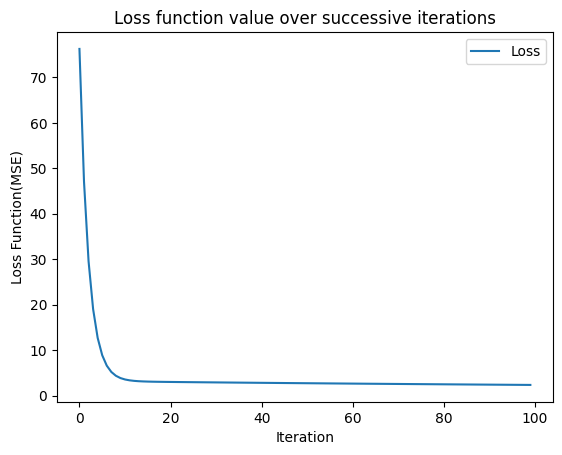

In [365]:
num_of_iter = 100
loss_value = []
def loss_fun(X, y, w):
    N = len(y)
    y_pred = X @ w  
    loss = (1/N)*sum(((y_pred - y) ** 2))
    return loss

for iter in range(num_of_iter):
    grad = gradient(x, y, w)  
    w = w - learning_rate * grad  
    loss = loss_fun(x, y, w)  
    loss_value.append(loss)  
    
plt.plot(range(num_of_iter), loss_value, label="Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss Function(MSE)")
plt.title("Loss function value over successive iterations")
plt.legend()
plt.show()


### Zadanie 6 **Check Your Results**

After training, compare your weights to the true ones . Plot the data and compare the fitted model with the ground truth line.

In [366]:
print(x.shape)  
print(w.shape)  

(100, 2)
(2,)


In [367]:
print(w)

[2.89479544 1.81747961]


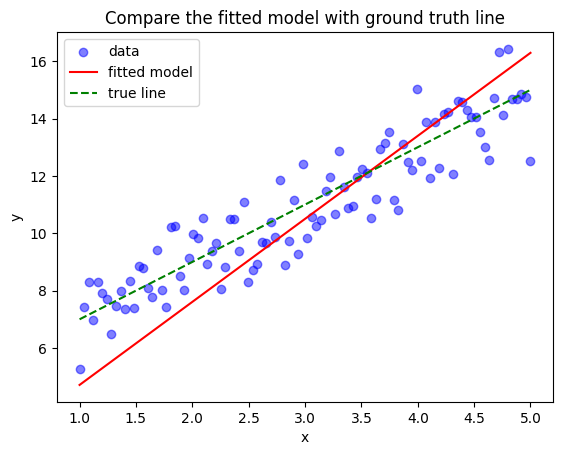

In [368]:
y_pred = x @ w  

plt.scatter(x[:,0], y, label="data", color='blue', alpha=0.5)
plt.plot(x[:,0], y_pred, label="fitted model", color='red')
plt.plot(x[:,0], 2*x[:,0] + 5, label="true line", color='green', linestyle='dashed')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Compare the fitted model with ground truth line")
plt.legend()
plt.show()

The weights trained by the model are different from the true ones. In the picture, we see that the fitted model line tries to fit the data, but the ground truth line fits it better.

### Zadanie 7 **Experiment with Learning Rate**

The learning rate $\alpha$ controls how big of a step we take during each iteration of gradient descent.  
Try training your model with different learning rates:

$$

\alpha \in [10^{-6}, 10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}]

$$

For each value:
- **Plot** the loss curve (loss vs. epoch)
- **Record** the final weights and final loss
- **Observe** how quickly (or slowly) the model converges

What happens when the learning rate is too small? Too large?  
Is there an optimal value in this range?


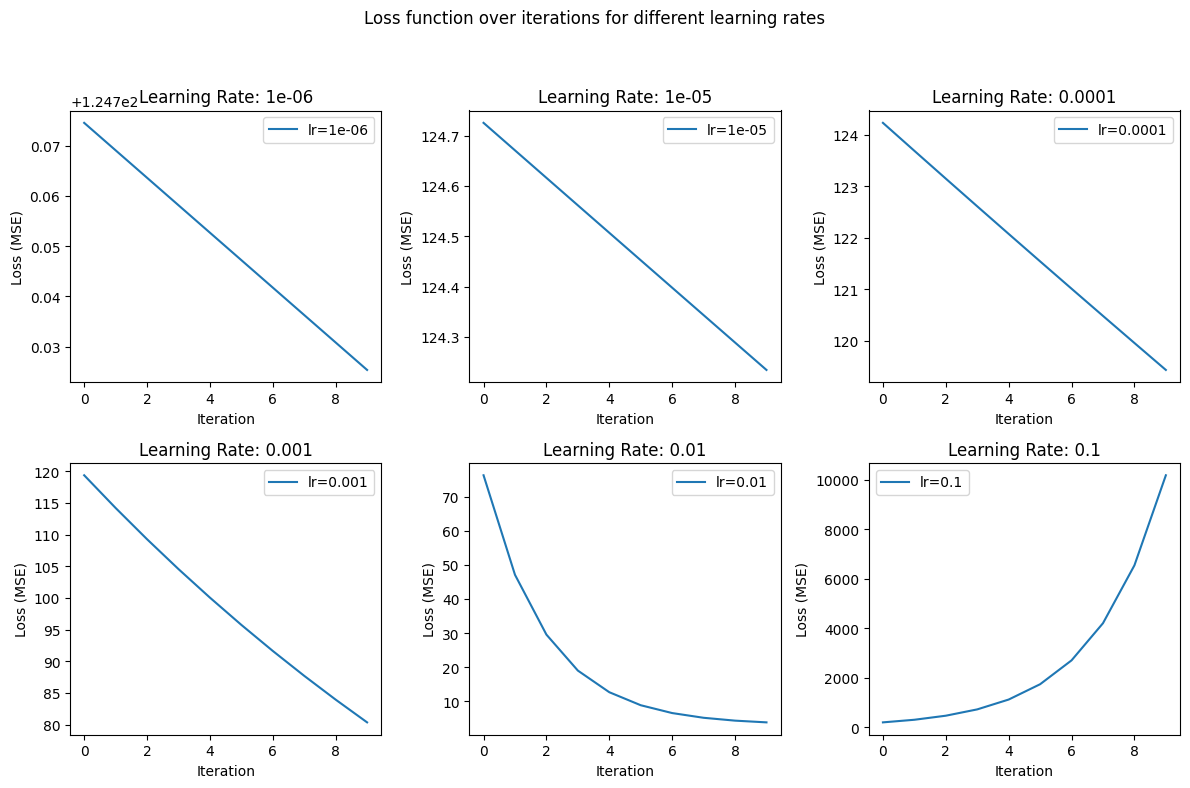

In [369]:
def Gradient_descent_ex7(lr, epsilon=1e-6, max_iter=10):
    w = np.zeros(2)  
    loss_value = []

    def loss_fun(X, y, w):
        y_pred = X @ w
        loss = np.mean((y_pred - y) ** 2)  
        return loss

    prev_loss = float('inf')  

    for iter in range(max_iter):
        grad = gradient(x, y, w)  
        w = w - lr * grad  
        loss = loss_fun(x, y, w)  
        loss_value.append(loss)

        if abs(prev_loss - loss) < epsilon:
            print(f"Gradient descent stop after {iter} iteration")
            print(f"weight for lr = {lr} : {w}")
            print(f"loss for lr = {lr} : {loss_value[-1]}")
            break

        prev_loss = loss  


    return w, loss_value


lr_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))  
fig.suptitle("Loss function over iterations for different learning rates")

for i, lr in enumerate(lr_list):
    w, loss_value = Gradient_descent_ex7(lr)
    row, col = divmod(i, 3) 

    ax = axes[row, col]  
    ax.plot(range(len(loss_value)), loss_value, label=f"lr={lr}")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Loss (MSE)")
    ax.set_title(f"Learning Rate: {lr}")
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

If learning rate is too small, the learning process takes much longer than with an appropriate learning rate, and the loss function does not reach as low a value as with an appropriate learning rate. If the learning rate is too large, the algorithm overshoots the minimum. The appropriate learning rate is 0.01, because the process finds the lowest value of the loss function compared to other tested learning rates. The stopping criterion is the maximum number of iterations.

### Zadanie 8 **Explore Training Duration**

Set `num_epochs` to larger values like 100 or 1000 and observe the training process:

- Does the loss continue to decrease throughout training, or does it plateau?
- At what point does the model effectively converge?
- Plot the loss curve for the extended training and identify where diminishing returns begin.
- Calculate how close your final weights are to the true weights after different numbers of epochs.

This exercise helps you understand when to stop training to avoid wasting computational resources.


Implementation with the maximum number of iterations as the stopping criterion.

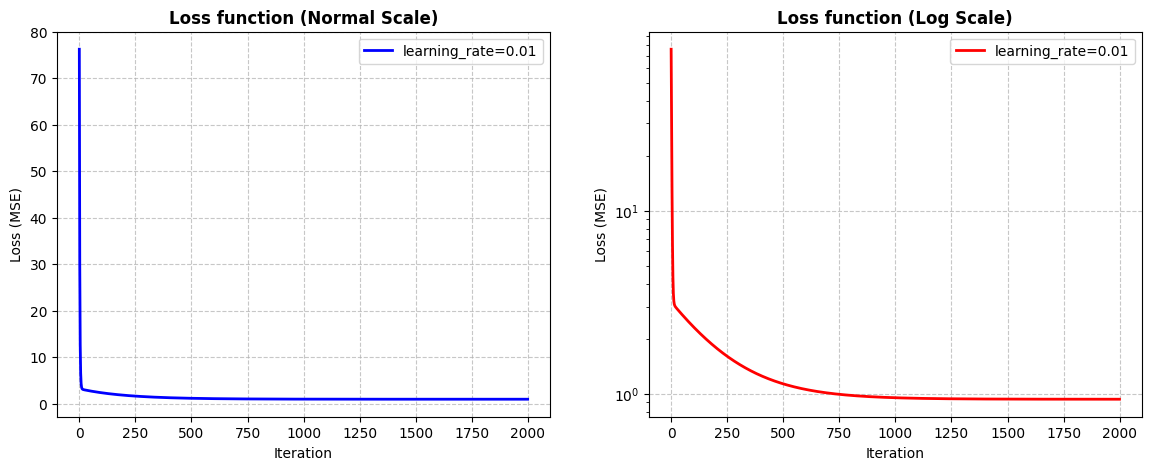

In [370]:

def Gradient_descent_ex8(x,y,learning_rate, max_iter=2000):
    w = np.zeros(x.shape[1])
    loss_value = []

    def loss_fun(X, y, w):
        y_pred = X @ w
        loss = np.mean((y_pred - y) ** 2)  
        return loss

    prev_loss = float('inf')  

    for iter in range(max_iter):
        grad = gradient(x, y, w)  
        w = w - learning_rate * grad  
        loss = loss_fun(x, y, w)  
        loss_value.append(loss)

        prev_loss = loss  

    return w, loss_value

learning_rate = 1e-2

w, loss_value = Gradient_descent_ex8(x,y,learning_rate)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(len(loss_value)), loss_value, label=f"learning_rate={learning_rate}", color="blue", linewidth=2)
axes[0].set_title("Loss function (Normal Scale)", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Iteration", fontsize=10)
axes[0].set_ylabel("Loss (MSE)", fontsize=10)
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.7)

axes[1].plot(range(len(loss_value)), loss_value, label=f"learning_rate={learning_rate}", color="red", linewidth=2)
axes[1].set_yscale("log")  # Ustawienie skali logarytmicznej
axes[1].set_title("Loss function (Log Scale)", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Iteration", fontsize=10)
axes[1].set_ylabel("Loss (MSE)", fontsize=10)
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.7)

plt.show()



Gradient descent stop after 1920 iteration
weight for lr = 0.01 : [1.95264633 5.03311015]
loss for lr = 0.01 : 0.9359002676654414


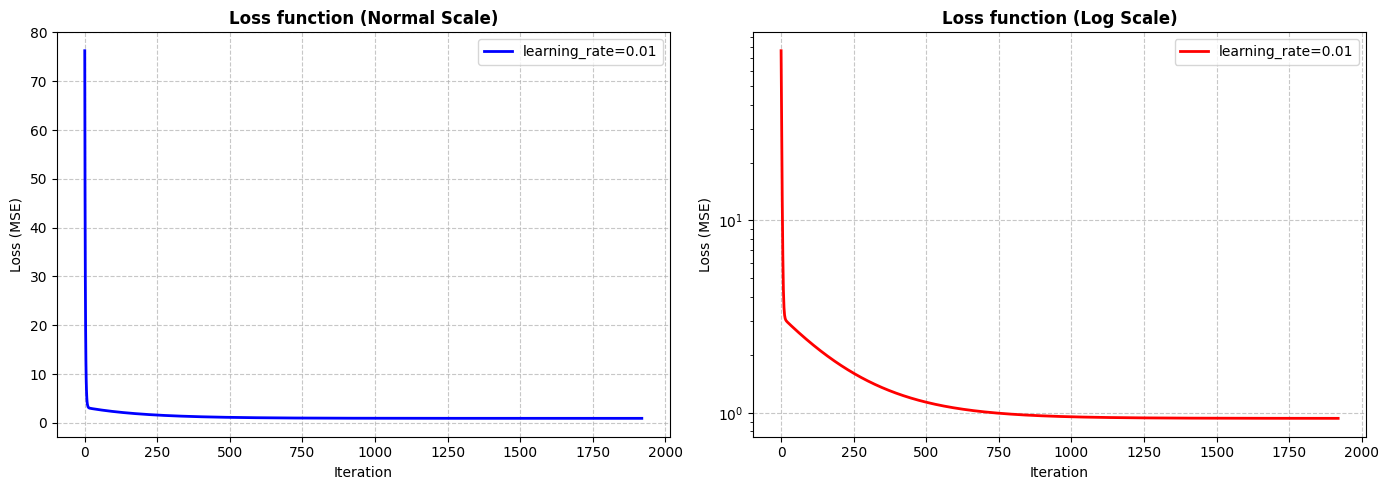

In [371]:
w_history=[]
def Gradient_descent_ex8_eps(x,y, lr, epsilon=1e-6):
    w = np.zeros(2)  
    loss_value = []

    def loss_fun(X, y, w):
        y_pred = X @ w
        loss = np.mean((y_pred - y) ** 2)  
        return loss

    prev_loss = float('inf')  
    i=0
    while(True):
        i+=1
        w_history.append(w)
        grad = gradient(x, y, w)  
        w = w - lr * grad  
        loss = loss_fun(x, y, w)  
        loss_value.append(loss)

        if abs(prev_loss - loss) < epsilon:
            print(f"Gradient descent stop after {i} iteration")
            print(f"weight for lr = {lr} : {w}")
            print(f"loss for lr = {lr} : {loss_value[-1]}")
            break

        prev_loss = loss  


    return w, loss_value


learning_rate = 1e-2

w, loss_value = Gradient_descent_ex8_eps(x,y,learning_rate)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(len(loss_value)), loss_value, label=f"learning_rate={learning_rate}", 
             color="blue", linewidth=2)
axes[0].set_title("Loss function (Normal Scale)", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Iteration", fontsize=10)
axes[0].set_ylabel("Loss (MSE)", fontsize=10)
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.7)

axes[1].plot(range(len(loss_value)), loss_value, label=f"learning_rate={learning_rate}", 
             color="red", linewidth=2)
axes[1].set_yscale("log")  
axes[1].set_title("Loss function (Log Scale)", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Iteration", fontsize=10)
axes[1].set_ylabel("Loss (MSE)", fontsize=10)
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

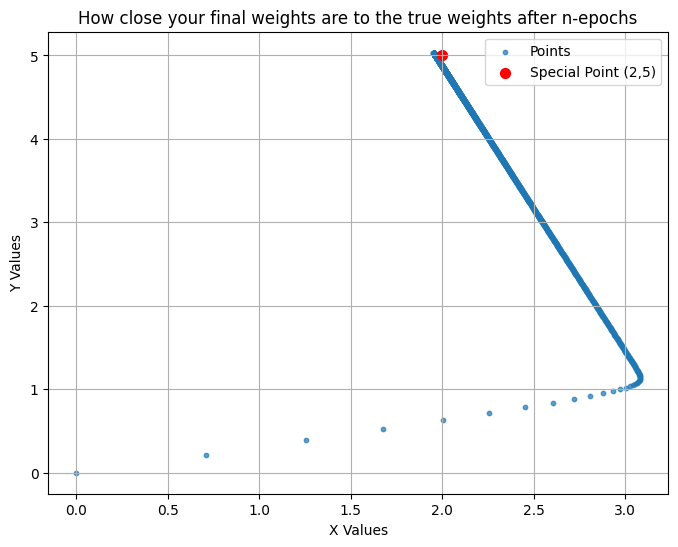

In [372]:
w_history = np.array(w_history)
x_values = w_history[:, 0]
y_values = w_history[:, 1]

# Plot scatter points
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, alpha=0.7, s=10, label="Points")  # Scatter plot
plt.scatter(2, 5, color='red', s=50, label="Special Point (2,5)")

# Labels and title
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("How close your final weights are to the true weights after n-epochs")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [373]:
w_history[-1]

array([1.95267443, 5.03301422])

1. We can chose a epsilon, which is the stopping criterion. In the picture, we see taht a loss function does not decrease after 1000 iteration. But if we chose epsilon equal 1e-6, the algorithm stop after 1920 iteration.
2. In the picture, we can see that model effectively converge after 1000 iteration.
3. Diminishing returns begins after 1920 iteration, if we chose epsilon equal 1e-6.
4. The last weights are close to the true weights because they differ only in the second decimal place.

### Zadanie 9 **Visualize the Loss Landscape**

Create a visualization of the loss function across different weight values:

- **Generate** a grid of weight values
- **Calculate** the loss at each point in this grid
- **Create** a contour plot showing the *“landscape”* of the loss function
- **Mark** your initial weights, final weights, and the true weights on this plot

This visualization will help you **understand** the shape of the objective function you’re optimizing and how gradient descent navigates this landscape to find the minimum.


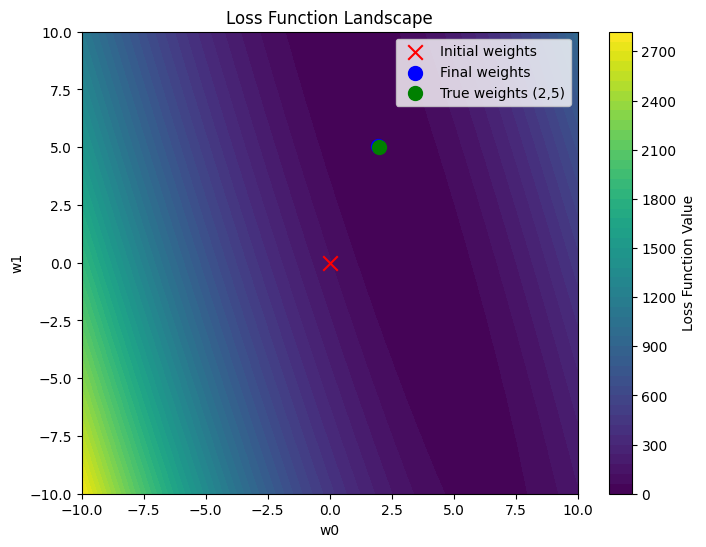

In [374]:
w0_range = np.linspace(-10, 10, 50)  
w1_range = np.linspace(-10, 10, 50)  
W0, W1 = np.meshgrid(w0_range, w1_range)
loss_values = np.zeros_like(W0)

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w_sample = np.array([W0[i, j], W1[i, j]])
        loss_values[i, j] = loss_fun(x, y, w_sample)


plt.figure(figsize=(8, 6))
plt.contourf(W0, W1, loss_values, levels=50, cmap='viridis')
plt.colorbar(label="Loss Function Value")


plt.scatter(0, 0, color='red', label="Initial weights", marker='x', s=110)
plt.scatter(w_history[-1][0], w_history[-1][1], color='blue', label="Final weights", marker='o', s=100)
plt.scatter(2, 5, color='green', label="True weights (2,5)", marker='o', s=100)


plt.xlabel("w0")
plt.ylabel("w1")
plt.title("Loss Function Landscape")
plt.legend()
plt.show()

### Zadanie 10 **Analytical Solution**

For linear regression, the closed-form solution is:

$$
\hat{w} = (X^T X)^{-1} X^T y
$$

Compare the parameters and final MSE you get via gradient descent with those from the analytical solution. Are they similar?



In [375]:
def Gradient_descent_ex8_eps(x,y, lr=0.01, epsilon=1e-6):
    w = np.zeros(2)  

    def loss_fun(X, y, w):
        y_pred = X @ w
        loss = np.mean((y_pred - y) ** 2)  
        return loss

    prev_loss = float('inf')  
    i=0
    while(True):
        i+=1
        grad = gradient(x, y, w)  
        w = w - lr * grad  
        loss = loss_fun(x, y, w)  

        if abs(prev_loss - loss) < epsilon:
            print(f"Gradient descent stop after {i} iteration")
            break

        prev_loss = loss  


    return w, loss

In [376]:
def loss_function(X, y, w):
    y_pred = X @ w
    loss = np.mean((y_pred - y) ** 2)
    return loss

In [377]:

def result(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

w_analytical = result(x, y)
w_gd, loss_gd = Gradient_descent_ex8_eps(x, y)
loss_analytical = loss_function(x, y, w_analytical)
print("Weights from Analytical Solution:",w_analytical)
print("Loss from Analytical Solution:", loss_analytical)
print("Weights from Gradient Descent:", w_gd)
print("Loss from Gradient Descent:", loss_gd)

Gradient descent stop after 1920 iteration
Weights from Analytical Solution: [1.94106258 5.0726464 ]
Loss from Analytical Solution: 0.9356948460632201
Weights from Gradient Descent: [1.95264633 5.03311015]
Loss from Gradient Descent: 0.9359002676654414


The parameters obtained using the gradient descent method are close to those obtained with the analytical solution. The loss function values for both solutions are also similar, with the analytical solution having a slight advantage.

### Zadanie 11 **High Dimensional Example**

Extend your implementation to work with higher-dimensional data.  
Generate a synthetic dataset with 10 features (\(d = 10\)) and:

- **Create** new true weight vector and bias
- **Generate** the higher-dimensional \(X\) and corresponding \(y\)
- **Train** your model using gradient descent on this data
- **Compare** the training process with the 1D case:
  - Does it take more epochs to converge?
  - How does the learning rate affect convergence in higher dimensions?
  - Compare the final loss and accuracy of your model
  - Visualize how well your model fits the data (you may need to use partial dependence plots or other visualization techniques for high-dimensional data)


- Does it take more epochs to converge?

Gradient Descent stopped at iteration 410
True Weights: [ 1.47911698  0.47594636 -0.1858056   1.05404247 -0.78587616  1.31902001
 -0.17228886 -1.8460296  -0.72475737 -0.01380577]
Weights from Gradient Descent: [ 1.4829771   0.47741717 -0.1898985   1.05251375 -0.78329269  1.30772778
 -0.16379864 -1.8491376  -0.71386443 -0.01349853]


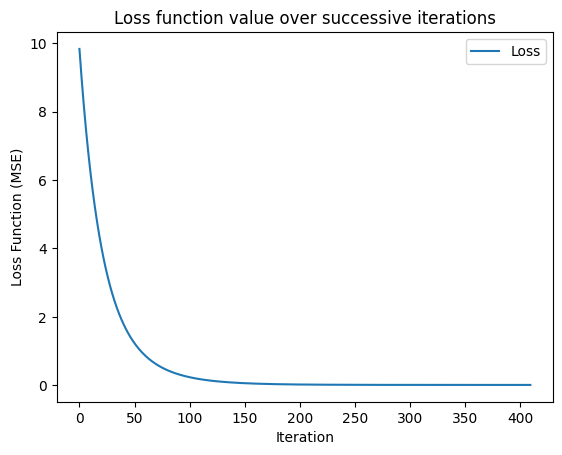

In [378]:
def generate_high_dimensional_data(n_samples=100, n_features=10):
    X = np.random.randn(n_samples, n_features)  
    true_w = np.random.randn(n_features) 
    y = X @ true_w + np.random.randn(n_samples) * 0.1  
    return X, y, true_w

def loss_fun(X, y, w):
    y_pred = X @ w
    return np.mean((y_pred - y) ** 2)

def gradient_descent(X, y, lr=0.01, epsilon=1e-6):
    w = np.zeros(X.shape[1])  
    prev_loss = float('inf')  
    loss_value = []

    i=0
    while(True):
        i+=1
        y_pred = X @ w
        grad = (2 / len(y)) * X.T @ (y_pred - y)
        w -= lr * grad
        loss = loss_fun(X, y, w)
        loss_value.append(loss)

        if abs(prev_loss - loss) < epsilon:
            print(f"Gradient Descent stopped at iteration {i}")
            break

        prev_loss = loss  

    return w, loss_value



X, y1, true_w = generate_high_dimensional_data()

w_gd, loss_values = gradient_descent(X, y1)


print("True Weights:", true_w)
print("Weights from Gradient Descent:", w_gd)

plt.plot(range(len(loss_values)), loss_values, label="Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss Function (MSE)")
plt.title("Loss function value over successive iterations")
plt.legend()
plt.show()

1. Algorithm needs a lower number of epochs to covergence on ten-dimensional data (410 iterations) than two-dimensional data (1920 iterations).

- How does the learning rate affect convergence in higher dimensions?

Learning rate test on ten-dimensional data.

In [379]:
def gradient_descent(X, y, lr=0.01, epsilon=1e-6, max_iter=5000):
    w = np.zeros(X.shape[1])
    prev_loss = float('inf')
    loss_values = []

    for i in range(max_iter):
        grad = (2 / len(y)) * X.T @ (X @ w - y)
        w -= lr * grad
        loss = np.mean((X @ w - y) ** 2)
        loss_values.append(loss)

        if abs(prev_loss - loss) < epsilon:
            print(f"Gradient Descent stopped at iteration {i} for lr={lr}")
            return w, loss_values, i  
        
        prev_loss = loss

    return w, loss_values, max_iter  

Gradient Descent stopped at iteration 3789 for lr=0.001
Gradient Descent stopped at iteration 462 for lr=0.01
Gradient Descent stopped at iteration 52 for lr=0.1


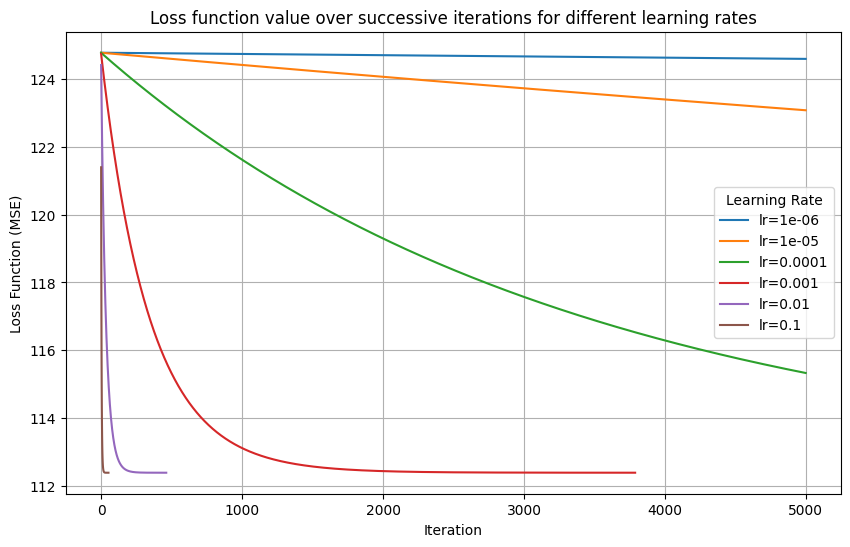

In [380]:
lr_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

plt.figure(figsize=(10, 6))  

for lr in lr_list:
    w_gd, loss_values, num_iter = gradient_descent(X, y, lr)  

    #print(f"Learning Rate: {lr}")
    #print("True Weights:", true_w)
    #print("Weights from Gradient Descent:", w_gd)
    #print(f"Final Loss: {loss_values[-1]}\n")

    plt.plot(range(len(loss_values)), loss_values, label=f"lr={lr}")


plt.xlabel("Iteration")
plt.ylabel("Loss Function (MSE)")
plt.title("Loss function value over successive iterations for different learning rates")
plt.legend(title="Learning Rate")  
plt.grid(True)  
plt.show()

In higher dimensions, we can use a higher learning rate, and the loss function does not overflow. The algorithm converges faster in higher dimensions than in lower ones.

 - Compare the final loss and accuracy of your model

In [381]:
w_gd_h, loss_values_h = Gradient_descent_ex8(X, y1, 0.01)
w_gd_l, loss_values_l = Gradient_descent_ex8(x, y, 0.01)

In [382]:
print(f"loss value to two-dimentional data = {loss_values_l[-1]}")
print(f"loss value to ten-dimentional data = {loss_values_h[-1]}")

loss value to two-dimentional data = 0.9358342399319263
loss value to ten-dimentional data = 0.008525961951629637


We can see that the loss value for two-dimensional data is higher than for ten-dimensional data. Accuracy is not used in linear regression problems.

  - Visualize how well your model fits the data (you may need to use partial dependence plots or other visualization techniques for high-dimensional data)

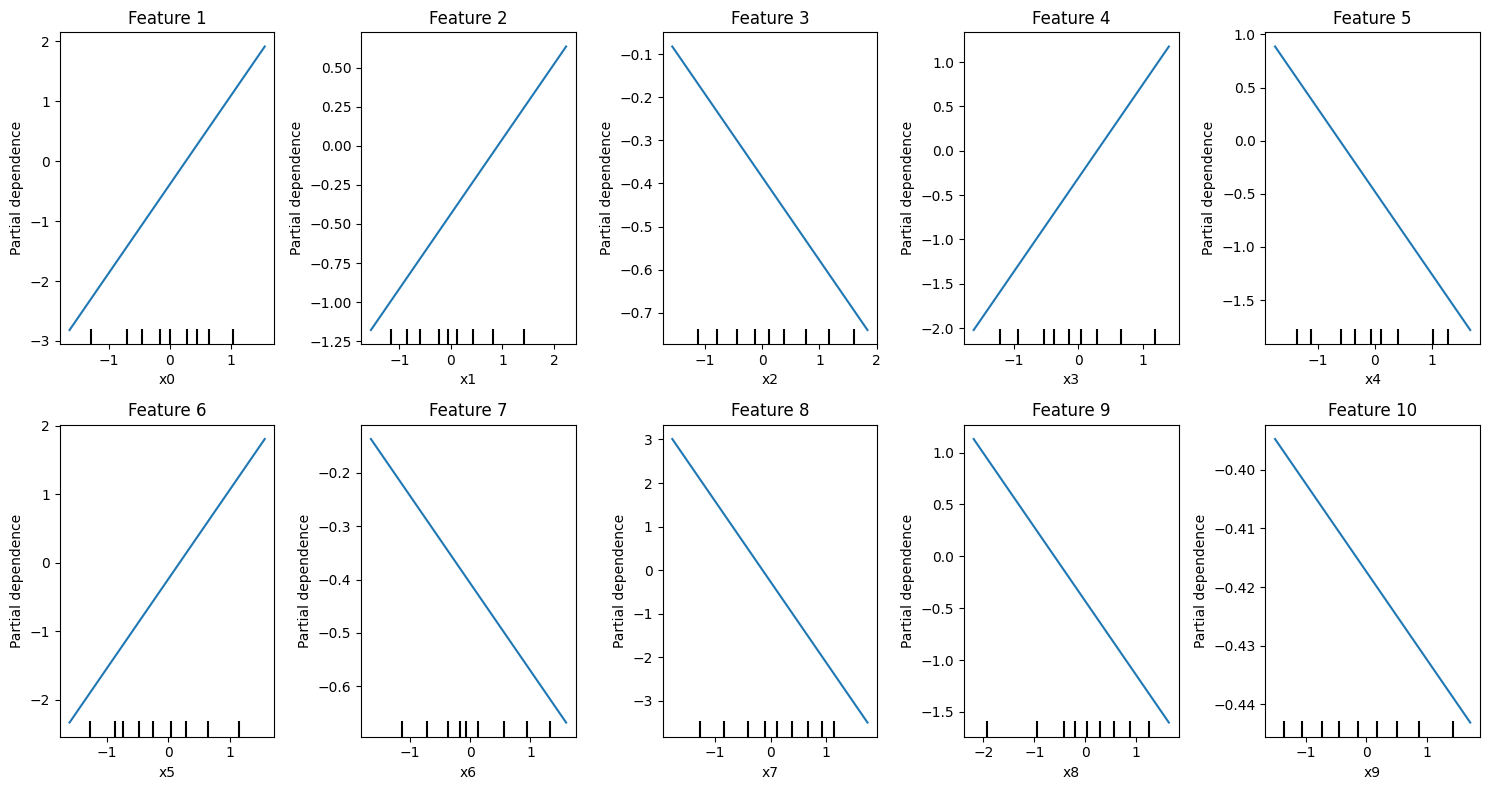

In [383]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.linear_model import LinearRegression

model_custom = LinearRegression()
model_custom.coef_ = w_gd_h  
model_custom.intercept_ = 0  

num_features = X.shape[1]

fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for i, ax in enumerate(axes.ravel()): 
    PartialDependenceDisplay.from_estimator(model_custom, X, features=[i], ax=ax)
    ax.set_title(f"Feature {i+1}")

plt.tight_layout()
plt.show()


Increasing Line (Figure: 1,2,4,6)
-The predicted value increases as the feature value increases.  
-These features have a positive impact on the model output.

Decreasing Line (Figure 3,5,7,8,9)
-The predicted value decreases as the feature value increases.  
-These features have a negative impact on the model output.

Almost Flat Line (Feature 10)
-This indicates that the feature has little influence on the model's predictions.
